In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set_style("darkgrid")

# Carregando o conjunto de dados
df = pd.read_csv('vgsales.csv')

In [2]:
# Visualizando as primeiras linhas do DataFrame
print("Primeiras 5 linhas:")
print(df.head())

# Verificando as informações do DataFrame (tipos de dados e valores nulos)
print("\nInformações do DataFrame:")
print(df.info())

# Contando valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Removendo linhas com valores nulos
# Neste caso, vamos remover as linhas com ano ou editora ausentes,
# pois são essenciais para nossa análise.
df.dropna(subset=['Year', 'Publisher'], inplace=True)

# Convertendo a coluna 'Year' para o tipo inteiro
df['Year'] = df['Year'].astype(int)

# Verificando novamente as informações após a limpeza
print("\nInformações após a limpeza:")
print(df.info())

Primeiras 5 linhas:
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Colu

C:\Users\Andresa\AppData\Local\Temp\ipykernel_12040\529638984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plataformas_mais_vendidas.index, y=plataformas_mais_vendidas.values, palette='viridis')


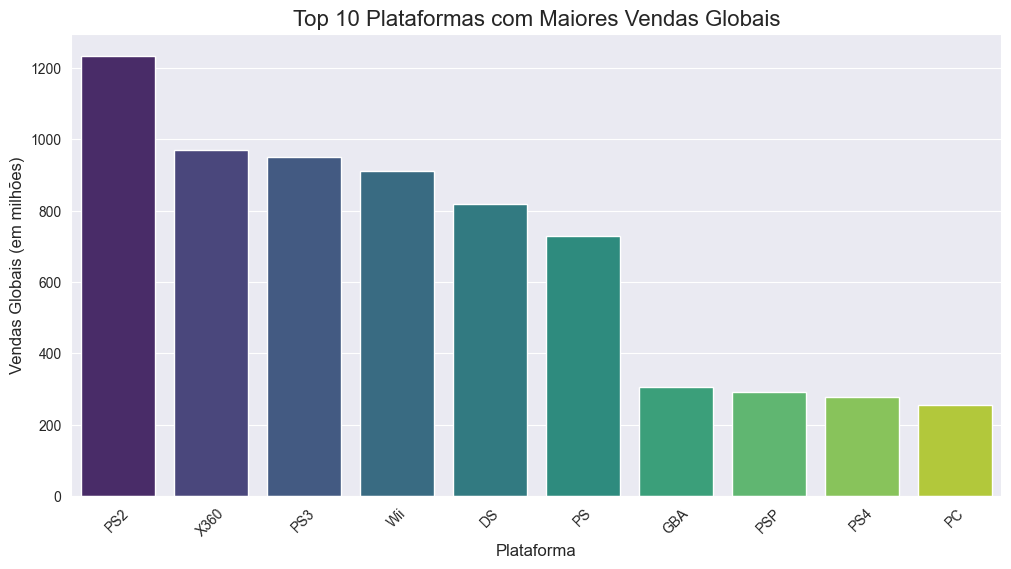

In [3]:
# Agrupando as vendas globais por plataforma e ordenando
plataformas_mais_vendidas = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=plataformas_mais_vendidas.index, y=plataformas_mais_vendidas.values, palette='viridis')
plt.title('Top 10 Plataformas com Maiores Vendas Globais', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Vendas Globais (em milhões)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

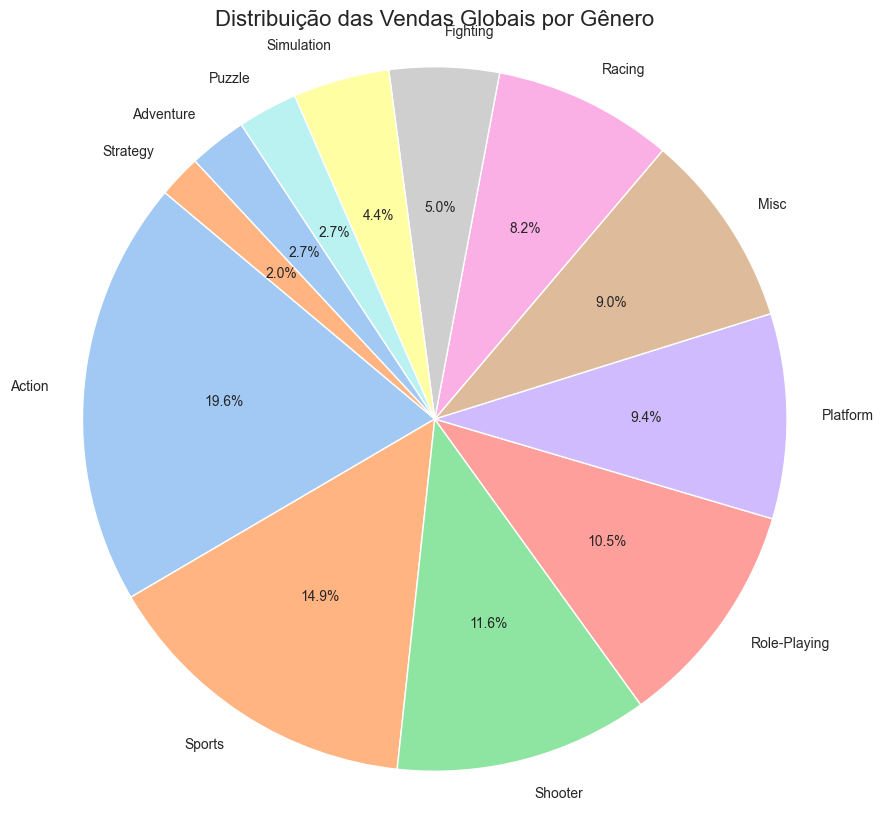

In [4]:
# Agrupando as vendas globais por gênero
generos_mais_vendidos = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Criando o gráfico de pizza para uma visualização diferente
plt.figure(figsize=(10, 10))
plt.pie(generos_mais_vendidos, labels=generos_mais_vendidos.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribuição das Vendas Globais por Gênero', fontsize=16)
plt.axis('equal') # Mantém o círculo do gráfico de pizza
plt.show()

C:\Users\Andresa\AppData\Local\Temp\ipykernel_12040\3946113821.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=editoras_mais_vendidas.values, y=editoras_mais_vendidas.index, palette='coolwarm')


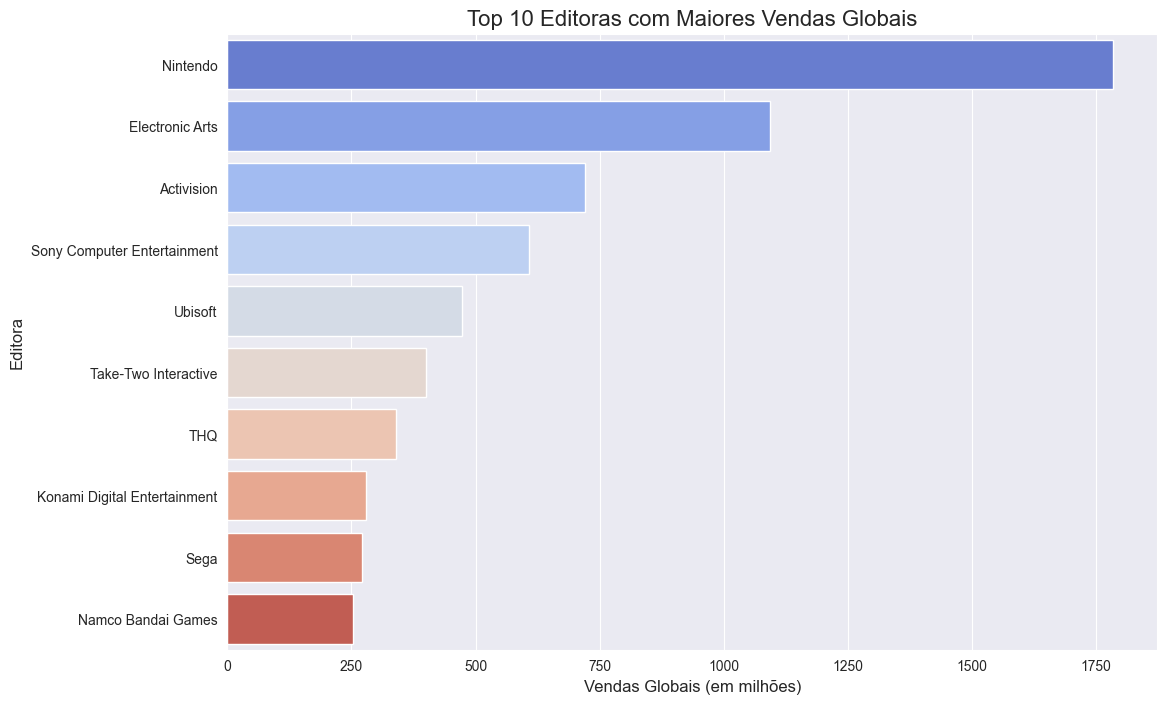

In [5]:
# Agrupando as vendas por editora
editoras_mais_vendidas = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Criando o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
sns.barplot(x=editoras_mais_vendidas.values, y=editoras_mais_vendidas.index, palette='coolwarm')
plt.title('Top 10 Editoras com Maiores Vendas Globais', fontsize=16)
plt.xlabel('Vendas Globais (em milhões)', fontsize=12)
plt.ylabel('Editora', fontsize=12)
plt.show()

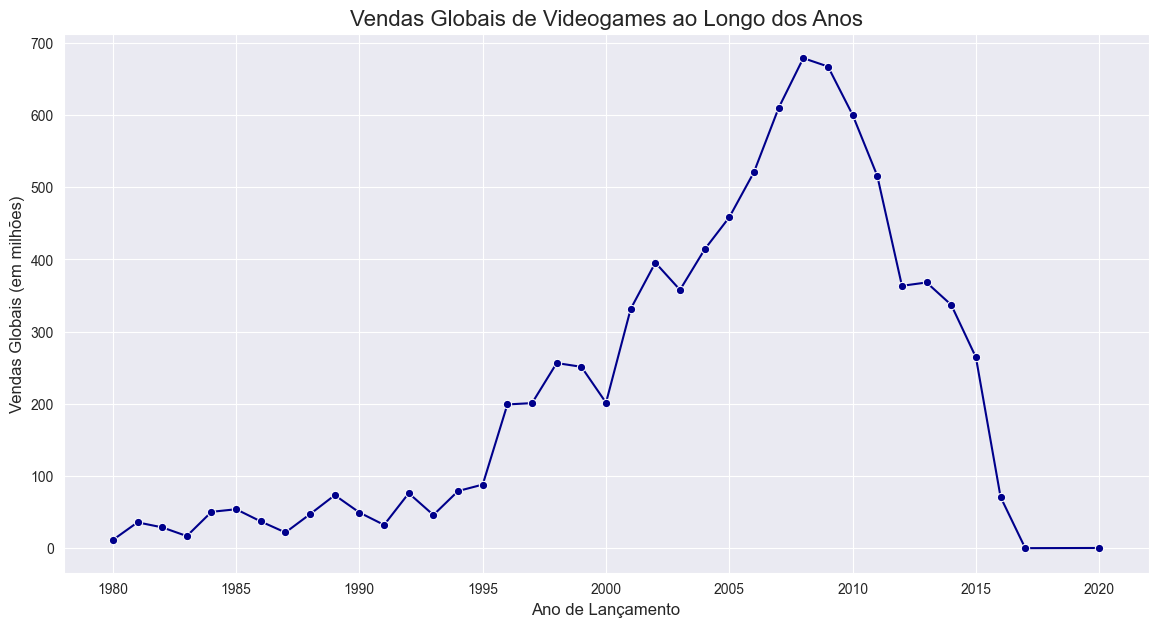

In [6]:
# Agrupando as vendas totais por ano
vendas_por_ano = df.groupby('Year')['Global_Sales'].sum()

# Criando um gráfico de linha para mostrar a tendência
plt.figure(figsize=(14, 7))
sns.lineplot(x=vendas_por_ano.index, y=vendas_por_ano.values, marker='o', color='darkblue')
plt.title('Vendas Globais de Videogames ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Vendas Globais (em milhões)', fontsize=12)
plt.grid(True)
plt.show()